## Parsing unity VR log file using functions in the locproc module

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
# If you want to import files from the parent directory, please add the directory to the path:
#import sys, os, inspect
#currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
#parentdir = os.path.dirname(currentdir)
#sys.path.insert(0, os.path.dirname(parentdir))
#print(sys.path)

In [3]:
from unityvr.preproc import logproc
from unityvr.viz import viz

In [4]:
dirName = '../sample'

# Sample data
# fileName = 'Log_2021-05-19_18-25-15_SS96_x_7f_f07_EB_panA2_t01.json'

# Lab data
fileName = 'Log_2023-06-12_14-22-52.json'


dat = logproc.openUnityLog(dirName, fileName)

for i in range(5):
    print(dat[i]['frame'])
    print(json.dumps(dat[i], sort_keys=True, indent=4))

0.0
{
    "frame": 0.0,
    "frameAfterSplash": 0.0,
    "sessionParameters": [
        "timeoutSecs: 5",
        "backgroundCylinderTexture: "
    ],
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0
}
0.0
{
    "frame": 0.0,
    "frameAfterSplash": 0.0,
    "heightPixels": 2160,
    "refreshRateHz": 60,
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0,
    "widthPixels": 3840
}
1.0
{
    "ficTracBallRadius": 0.04699999839067459,
    "ficTracServerAddress": "127.0.0.1",
    "ficTracServerPort": 2000,
    "ficTracSmoothingCount": 1,
    "frame": 1.0,
    "frameAfterSplash": 0.0,
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0
}
1.0
{
    "colliderType": "MeshCollider",
    "frame": 1.0,
    "frameAfterSplash": 0.0,
    "meshGameObjectPath": "Fly/FlyCamera3/FlyCamera3Screen",
    "timeSecs": 0.0,
    "timeSecsAfterSplash": 0.0,
    "worldPosition": {
        "x": 3.229198455810547,
        "y": 3.748500108718872,
        "z": -2.346149444580078
    },
    "worldRotationDegs": {

### Construct data object from log file
#### Extract header info

In [5]:
#print(dat[0]['headerNotes'])
logproc.makeMetaDict(dat, fileName)

{'expid': 'testExp',
 'experiment': 'test experiment',
 'genotype': 'testGenotype',
 'sex': 'NA',
 'flyid': 'NA',
 'trial': 'trial4-22-52',
 'date': '2023-06-12',
 'time': '14-22-52',
 'ballRad': 0.04699999839067459,
 'setFrameRate': 60,
 'notes': 'NA',
 'angle_convention': 'right-handed'}

#### Pull out object positions as pandas dataframe

In [6]:
objDf = logproc.objDfFromLog(dat)
objDf.head()

,name,collider,px,py,pz,rx,ry,rz,sx,sy,sz
0,Fly/FlyCamera3/FlyCamera3Screen,MeshCollider,3.229198,-2.346149,3.7485,0.0,0.0,306.0,5.8,1.0,9.5
1,Fly/FlyCamera2/FlyCamera2Screen,MeshCollider,3.229198,2.34615,3.7485,0.0,0.0,234.0,5.800001,1.0,9.5
2,Fly/FlyCamera4/FlyCamera4Screen,MeshCollider,-1.233444,-3.796151,3.7485,0.0,0.0,18.000004,5.800001,1.0,9.5
3,Fly/FlyCamera1/FlyCamera1Screen,MeshCollider,-1.233444,3.79615,3.7485,0.0,0.0,162.0,5.8,1.0,9.5
4,cylinder_4096_upY_flipped/default,NA,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,15.0


#### Pull out fly position as pandas dataframe
Position in VR

In [7]:
posDf, ftDf, tsDf = logproc.timeseriesDfFromLog(dat, computePDtrace=False)

correcting for Unity angle convention.
len(pdDf): 576
len(dtDf): 576
creating nidDf


In [8]:
print(len(posDf))
posDf.head()

576


,frame,time,dt,x,y,angle,dx,dy,dxattempt,dyattempt
0,1.0,0.000000,0.020000,0.000085,-0.00007,359.997,0.000085,-0.00007,0.000085,-0.00007
1,2.0,0.020000,0.020000,0.000085,-0.00007,359.997,0.000000,0.00000,0.000000,0.00000
2,3.0,0.035646,0.015646,0.000085,-0.00007,359.997,0.000000,0.00000,0.000000,0.00000
3,4.0,0.040715,0.005069,0.000085,-0.00007,359.997,0.000000,0.00000,0.000000,0.00000
4,5.0,0.046776,0.006062,0.000085,-0.00007,359.997,0.000000,0.00000,0.000000,0.00000


In [9]:
# Extract ball radius
matching = [s for s in dat if "ficTracBallRadius" in s]
ballRadius = matching[0]["ficTracBallRadius"]
print(ballRadius) # in decimeters

#conversion factor to cm
dc2cm = 10

0.04699999839067459


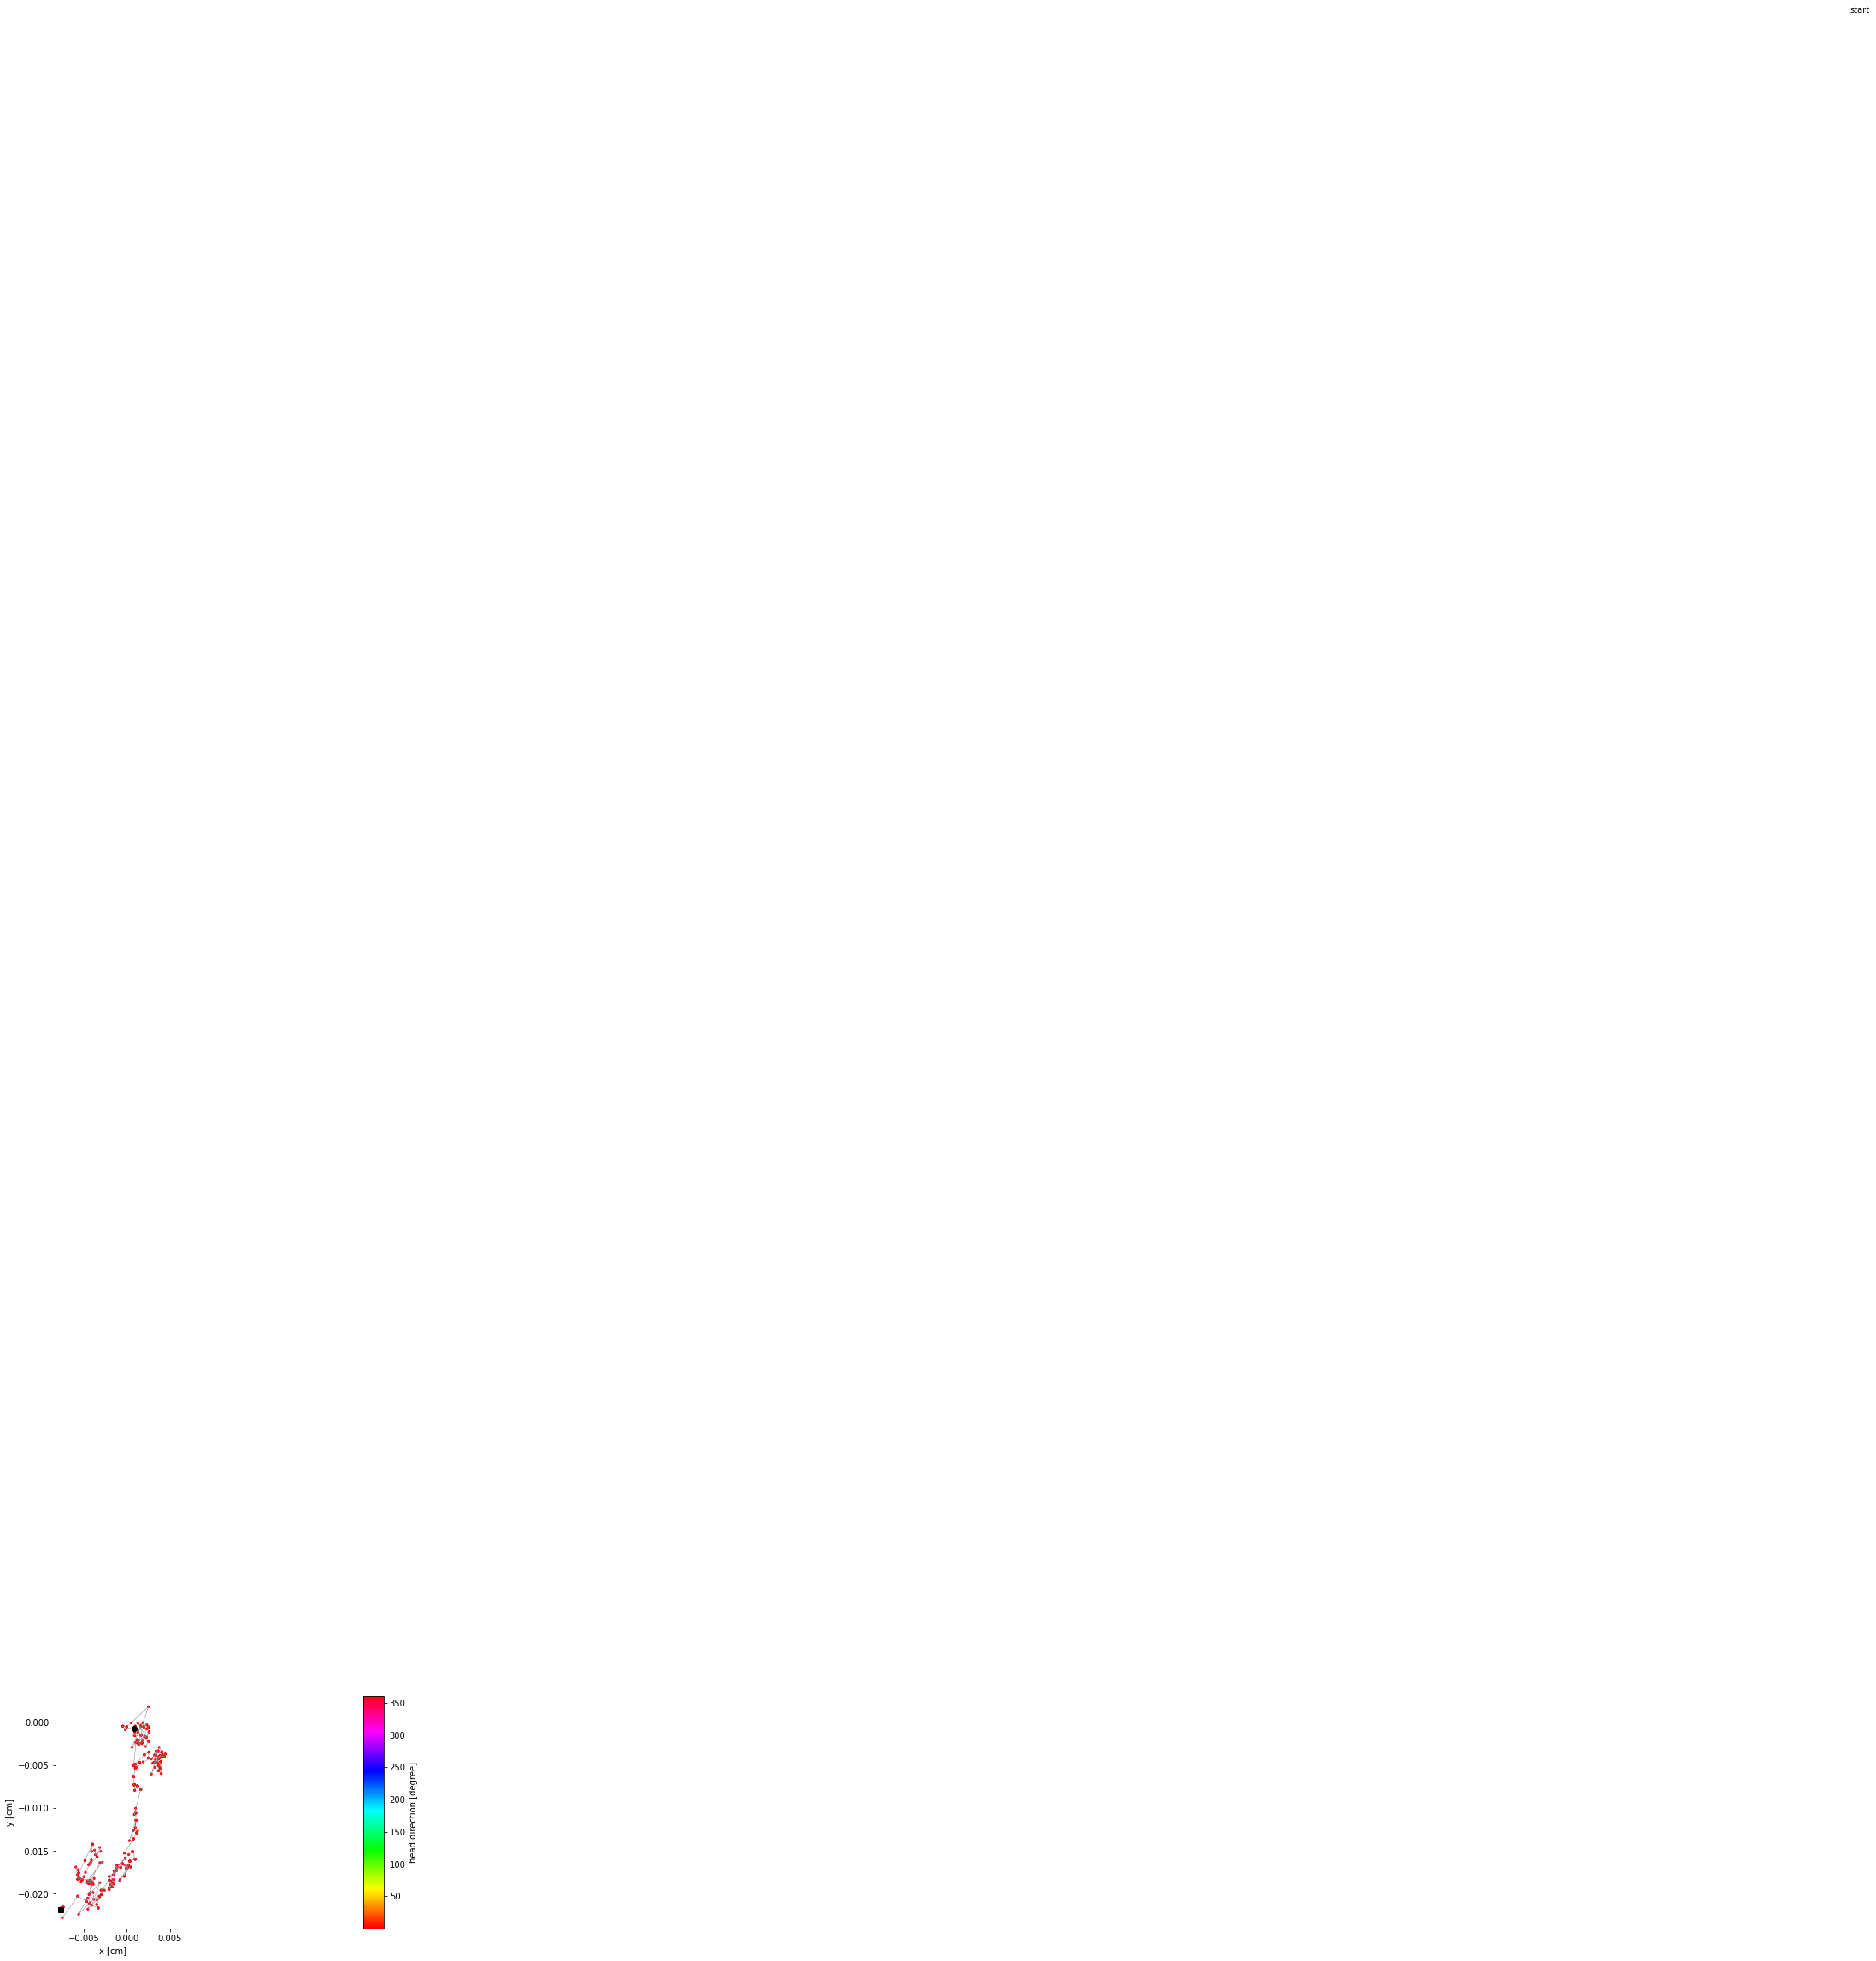

In [10]:
fig, axs = plt.subplots(1,2,figsize=(10,5), gridspec_kw={'width_ratios':[20,1]})
axs[0].plot(posDf.x*dc2cm,posDf.y*dc2cm,color='grey', linewidth=0.5)
cb = axs[0].scatter(posDf.x*dc2cm,posDf.y*dc2cm,s=5,c=posDf.angle, cmap='hsv')
axs[0].plot(posDf.x[0]*dc2cm,posDf.y[0]*dc2cm,'ok')
axs[0].text(posDf.x[0]*dc2cm+0.2,posDf.y[0]*dc2cm+0.2,'start')
axs[0].plot(posDf.x.values[-1]*dc2cm,posDf.y.values[-2]*dc2cm,'sk')
axs[0].set_aspect('equal')
axs[0].set_xlabel('x [cm]')
axs[0].set_ylabel('y [cm]')
viz.utils.myAxisTheme(axs[0])
plt.colorbar(cb,cax=axs[1], label='head direction [degree]')

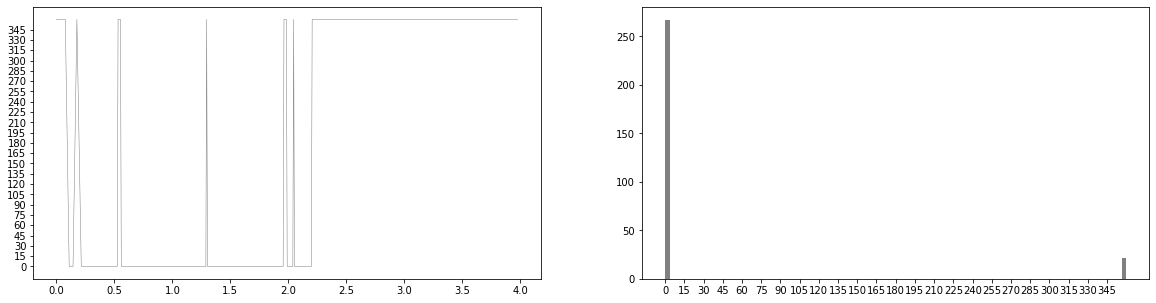

In [11]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(posDf.time,posDf.angle,color='grey', linewidth=0.5)
axs[0].set_yticks(np.arange(0, 360, 15));
axs[1].hist(posDf.angle[0:round(len(posDf.angle)/2)],color='grey', bins=100)
axs[1].set_xticks(np.arange(0, 360, 15));

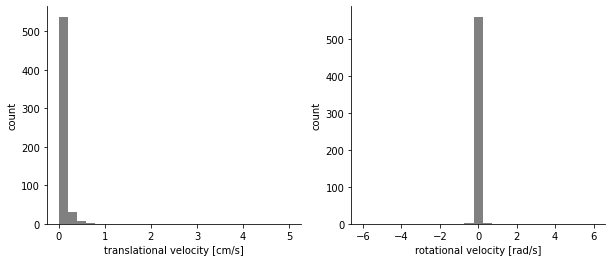

In [12]:
vt = np.hypot(posDf.dx*dc2cm, posDf.dy*dc2cm)/posDf.dt
vr = np.diff(posDf.angle*np.pi/180)/posDf.dt[1:]
fig, axs = plt.subplots(1,2,figsize=(10,4), gridspec_kw={'width_ratios':[1,1]})
axs[0].hist(vt,color='grey',bins=25, range=(0,5));
axs[0].set_xlabel('translational velocity [cm/s]')
axs[0].set_ylabel('count')
axs[1].hist(vr,color='grey',bins=25,range=(-6,6));
axs[1].set_xlabel('rotational velocity [rad/s]')
axs[1].set_ylabel('count')
for ax in axs:
    viz.utils.myAxisTheme(ax)

Position based on Fictrac tracking

In [13]:
print(len(ftDf))
ftDf.head()

580


,frame,ficTracTReadMs,ficTracTWriteMs,dx,dy,dz
0,1.0,0.0,0.0,-0.001212,0.000157,-0.000180
1,1.0,1.0,1.0,-0.001042,0.000115,-0.000153
2,1.0,4.0,4.0,-0.000271,0.000104,-0.000424
3,1.0,7.0,7.0,0.000461,0.001037,0.000327
4,1.0,11.0,11.0,0.000565,0.000391,0.000378


Photodiode signal and frame rate dataframe

In [14]:
print(len(tsDf))
tsDf.head()

576


,frame,time,dt,imgfsig,imgfFilt,imgfThresh,framestart,counts,frameinterp,timeinterp
0,1.0,0.000000,0.020000,0.000000,0.000000,0,0,1,1.0,0.000000
1,2.0,0.020000,0.020000,-4.190400,-4.190400,0,1,1,2.0,0.020000
2,3.0,0.035646,0.015646,-4.791849,-4.791849,0,1,1,3.0,0.035646
3,4.0,0.040715,0.005069,-5.074289,-5.074289,0,1,1,4.0,0.040715
4,5.0,0.046776,0.006062,-5.074461,-5.074289,0,1,1,5.0,0.046776


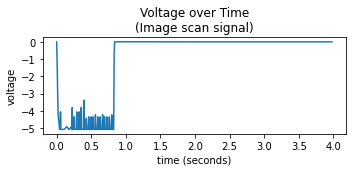

In [77]:
### Plot input voltage (microscope frame signal) over time
fig, ax = plt.subplots(figsize=(5,2.5))
ax.plot(tsDf['time'], tsDf['imgfsig'])

ax.set_yticks(range(0,-5-1,-1))

ax.set_ylabel("voltage")
ax.set_xlabel("time (seconds)")
ax.set_title("Voltage over Time\n(Image scan signal)")
plt.tight_layout()

fig.savefig("../results/image_scan_signal.png", dpi=600)

In [15]:
framesDf = tsDf[['frame','time','dt']].drop_duplicates().reset_index(level=0)[['frame','time','dt']]

In [16]:
framesDf.head()

,frame,time,dt
0,1.0,0.000000,0.020000
1,2.0,0.020000,0.020000
2,3.0,0.035646,0.015646
3,4.0,0.040715,0.005069
4,5.0,0.046776,0.006062


In [17]:
posDf['time'].max()

3.9763946533203125

Fictrac updates come in at a higher rate than the VR frame rate. Fictrac can also only run for a subset of the VR run time and therefore the number of frames in fictrac and vr dataframes may not match.

#### Frame rate

In [18]:
# Extract frame rate setting
matching = [s for s in dat if "refreshRateHz" in s]
forceframerate = matching[0]["refreshRateHz"]
print(forceframerate) # frame rate in Hz

60


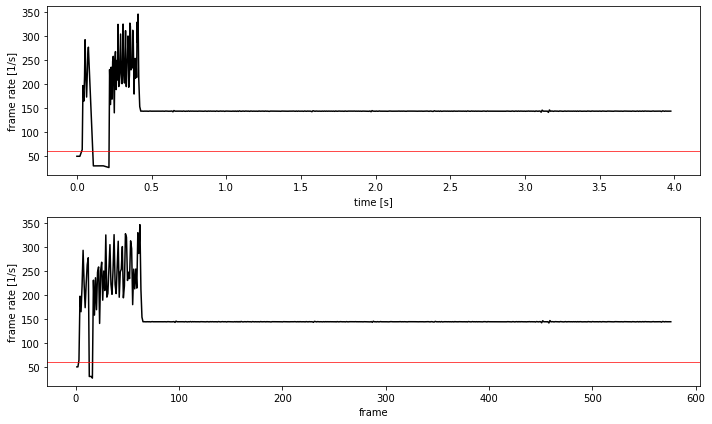

In [19]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(framesDf.time, 1/framesDf.dt, 'k')
ax[1].plot(framesDf.frame, 1/framesDf.dt, 'k')
ax[0].set_xlabel('time [s]')
ax[1].set_xlabel('frame');
for i in range(2):
    ax[i].axhline(forceframerate,0,1,color='r', linewidth=0.7)
    ax[i].set_ylabel('frame rate [1/s]')
fig.tight_layout()

#####  Note: The remaining visuzalizations require that an analog photodiode signal was recorded. 

In [20]:
if "pdSig" in tsDf.columns:
    fig, ax = plt.subplots(2,1, figsize=(10,6))
    window = 200
    for i, ts in enumerate([0,5000]):
        ax[i].plot(range(window),tsDf.pdsig[ts:ts+window],'-',color='grey',linewidth=0.5)

        even = tsDf[ts:ts+window][tsDf['frame'][ts:ts+window]%2==1]
        ax[i].plot(np.arange(window)[tsDf['frame'][ts:ts+window].values%2==1], even.pdsig, 'b.', label='even frame')

        odd = tsDf[ts:ts+window][tsDf['frame'][ts:ts+window]%2==0]
        ax[i].plot(np.arange(window)[tsDf['frame'][ts:ts+window].values%2==0], odd.pdsig, 'c.', label=
                  'odd frame')

        ax[i].set_xlabel('time [s]')
        ax[i].set_ylabel('photo diode signal')
        ax[i].set_xlabel('sample');
    ax[0].legend()
    fig.tight_layout()

In [21]:
if "pdSig" in tsDf.columns:
    fig, ax = plt.subplots(1,1, figsize=(10,4))
    for f in range(1000,1005):
        sig = tsDf.query('frame == '+str(float(f)))
        ax.plot(range(len(sig.pdsig)), sig.pdsig, '.-',  label='frame{}'.format(f))
    ax.legend()

Compute frame rate from photodiode signal

In [22]:
if "pdSig" in tsDf.columns:
    from scipy.signal import medfilt

    tsDf["pdFilt"]  = tsDf.pdsig.values
    tsDf.pdFilt[np.isfinite(tsDf.pdsig)] = medfilt(tsDf.pdsig[np.isfinite(tsDf.pdsig)])
    tsDf["pdThresh"]  = 1*(np.asarray(tsDf.pdFilt>=0.2+np.nanmedian(tsDf.pdFilt.values)))

Generate interpolated time

In [23]:
from scipy import interpolate

tsDf['framestart'] = np.hstack([0,1*np.diff(tsDf.time)>0])

tsDf['counts'] = 1
sampperframe = tsDf.groupby('frame').sum()[['time','dt','counts']].reset_index(level=0)
sampperframe['fs'] = sampperframe.counts/sampperframe.dt

frameStartIndx = np.hstack((0,np.where(tsDf.framestart)[0]))
frameStartIndx = np.hstack((frameStartIndx, frameStartIndx[-1]+sampperframe.counts.values[-1]-1))
frameIndx = tsDf.index.values

frameNums = tsDf.frame[frameStartIndx].values.astype('int')
frameNumsInterp = np.hstack((frameNums, frameNums[-1]+1))

timeAtFramestart = tsDf.time[frameStartIndx].values

#generate interpolated frames
frameinterp_f = interpolate.interp1d(frameStartIndx,frameNums)
tsDf['frameinterp'] = frameinterp_f(frameIndx)

timeinterp_f = interpolate.interp1d(frameStartIndx,timeAtFramestart)
tsDf['timeinterp'] = timeinterp_f(frameIndx)

In [24]:
if "pdSig" in tsDf.columns:
    fig, ax = plt.subplots(4,1, figsize=(10,10))
    ts = 1000
    wind = 300
    ax[0].plot(tsDf.timeinterp[ts:ts+wind], tsDf.pdsig[ts:ts+wind], 'k')
    ax[0].plot(tsDf.timeinterp[ts:ts+wind], tsDf.pdFilt[ts:ts+wind], 'c')
    ax[0].plot(tsDf.timeinterp[ts:ts+wind], tsDf.pdThresh[ts:ts+wind], '--',color='orange')
    ax[0].set_ylabel('photodiode signal [V]')
    ax[0].set_xlabel('time [s]')

    pdChange = np.hstack((0,np.diff(tsDf.pdThresh)))
    pdChangeT = tsDf.timeinterp.values[abs( pdChange )>0]

    ax[1].plot(tsDf.timeinterp, tsDf.pdsig, 'k')
    #ax[1].set_ylim(0,250)
    ax[1].set_xlabel('time [s]')
    ax[1].set_ylabel('photodiode signal [V]')

    ax[2].plot(pdChangeT[1:], 1/np.diff(pdChangeT), '.', color='grey')
    #ax[2].set_ylim(0,250)
    ax[2].axhline(forceframerate,0,1,color='r', linewidth=0.7)
    ax[2].set_xlabel('time [s]')
    ax[2].set_ylabel('photodiode-based\nframe rate [1/s]')

    ax[3].hist(1/np.diff(pdChangeT), 100, color='grey')
    ax[3].set_xlim(0,250)
    ax[3].axvline(forceframerate,0,1,color='r', linewidth=0.7)
    ax[3].set_ylabel('count')
    ax[3].set_xlabel('photodiode-based frame rate [1/s]')

    fig.tight_layout()